In [1]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [2]:
path = untar_data("https://storage.googleapis.com/sv-fastai/datasets/sv.fastai.l1.dataset.v4.tgz", dest=".")

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#4) [Path('valid'),Path('train'),Path('test'),Path('README.md')]

In [5]:
(path/"valid").ls()

(#8) [Path('valid/cessna_172'),Path('valid/raccoon'),Path('valid/sea_otters'),Path('valid/fox'),Path('valid/galendewagen'),Path('valid/rabbit'),Path('valid/gs'),Path('valid/x5')]

In [6]:
fns = get_image_files(path)

In [7]:
# failed = verify_images(fns)
# failed

In [8]:
# failed.map(Path.unlink);

In [9]:
objects = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(),
#     splitter=RandomSplitter(),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [10]:
dls = objects.dataloaders(path)

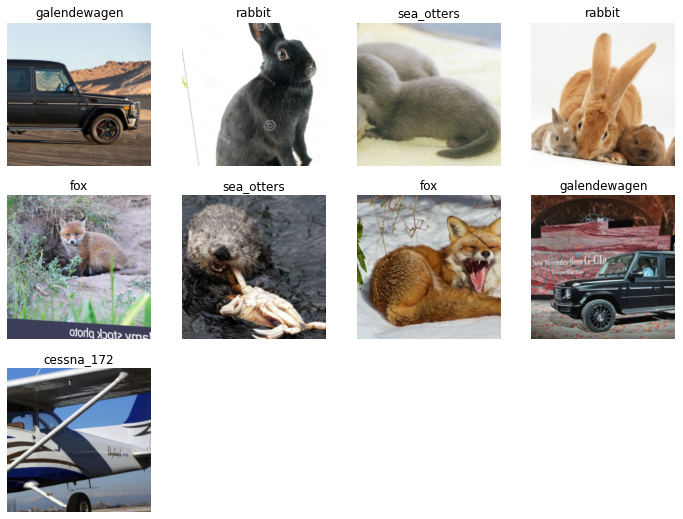

In [11]:
dls.show_batch(nrows=3, ncols=4)

In [12]:
objects.summary(path)

Setting-up type transforms pipelines
Found 11935 items
2 datasets of sizes 9102,2241
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      sv.fastai.l1.dataset.v4/train/cessna_172/a8fc83f3007db0a3a4916224ab478a54.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=400x225
  Pipeline: parent_label -> Categorize
    starting from
      sv.fastai.l1.dataset.v4/train/cessna_172/a8fc83f3007db0a3a4916224ab478a54.jpg
    applying parent_label gives
      cessna_172
    applying Categorize gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=400x225, TensorCategory(0))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starti

In [13]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.154824,0.038783,0.011156,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.090198,0.055735,0.015618,01:37
1,0.074153,0.018012,0.004909,01:35
2,0.037549,0.017544,0.004462,01:39
3,0.016987,0.013732,0.003570,01:37


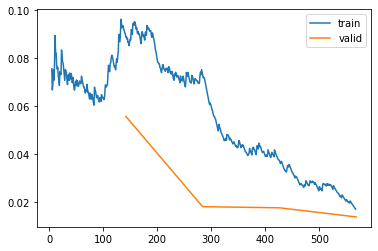

In [14]:
learn.recorder.plot_loss()

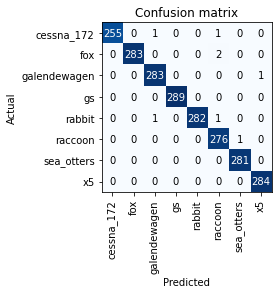

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
interp.top_losses()

torch.return_types.topk(
values=tensor([6.2625, 4.6682, 4.4317,  ..., -0.0000, -0.0000, -0.0000]),
indices=tensor([ 302,   76,  143,  ..., 2137, 2136,  868]))

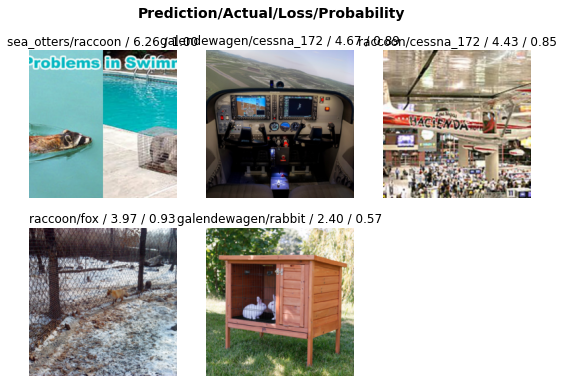

In [17]:
interp.plot_top_losses(9, nrows=3)

In [18]:
# #hide_output
# cleaner = ImageClassifierCleaner(learn, max_n=1)
# cleaner

In [19]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()